In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy.special as sp

In [ ]:
print("*Using Fitting Functions*")
print("Available Functions:")

In [19]:
print("\tPoly(x,pars_) returns an polynomial of order of pars. Starts with x^0 and increments up")
def Poly(x,pars_):
    output = 0
    for i in range(len(pars_)):
        output+=(x**i)*pars_[i]
    return output
print("\tPoly3(x,p0_,p1_,p2_,p3_) returns a 3rd order polynomial ")
def Poly3(x,p0_,p1_,p2_,p3_):
    return p0_+p1_*x+p2_*x*x+p3_*x*x*x
print("\tGaus(x,a_,m_,s_) returns a gaus with amplitude a_, mean m_, and sigma s_")
def Gaus(x, a_, m_, s_):
    return a_*np.exp(-(x-m_)*(x-m_)/(2*s_*s_))
print("\tGaus2(x,a_,m_,s_) returns two gaussians with amplitude a1/2_, mean m1/2_, and sigma s1/2_")
def Gaus2(x, a1_, m1_, s1_, a2_, m2_, s2_):
    return Gaus(x,a1_,m1_,s1_)+Gaus(x,a2_,m2_,s2_)
print("\tGaus_bk_const(x,a_,m_,s_,c_) returns a gaus with constant background c_")
def Gaus_bk_const(x,a1_,m1_,s1_,c_):
    return Gaus(x,a1_,m1_,s1_)+c_
print("\tGaus_bk_lin(x,a_,m_,s_,slope_,c_) returns a gaus with linear background")
def Gaus_bk_lin(x,a1_,m1_,s1_,slope_,c_):
    return Gaus(x,a1_,m1_,s1_)+Poly(x,[c_,slope_])
print("\tGaus_bk_quad(x,a_,m_,s_,sq0_,sq1_,sq2_) returns a gaus with quadratic background. # on sq is power of x")
def Gaus_bk_quad(x,a1_,m1_,s1_,sq0_,sq1_,sq2_):
    return Gaus(x,a1_,m1_,s1_)+Poly(x,[sq0_,sq1_,sq2_])


	Poly(x,pars_) returns an polynomial of order of pars. Starts with x^0 and increments up
	Poly3(x,p0_,p1_,p2_,p3_) returns a 3rd order polynomial 
	Gaus(x,a_,m_,s_) returns a gaus with amplitude a_, mean m_, and sigma s_
	Gaus2(x,a_,m_,s_) returns two gaussians with amplitude a1/2_, mean m1/2_, and sigma s1/2_
	Gaus_bk_const(x,a_,m_,s_,c_) returns a gaus with constant background c_
	Gaus_bk_lin(x,a_,m_,s_,slope_,c_) returns a gaus with linear background
	Gaus_bk_quad(x,a_,m_,s_,sq0_,sq1_,sq2_) returns a gaus with quadratic background. # on sq is power of x


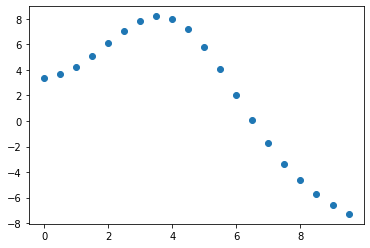

In [16]:
#x = np.array([i*0.5 for i in range(20)])
#y= Gaus_bk_lin(x,10,4,2,-1,2)
#plt.scatter(x,y)
#plt.show()

In [26]:
print("\tSuper_Gaus(x,a_,m_,s_,p_) returns a Super Gaussian that can have flatness modified with p_")
def Super_Gaus(x,a_,m_,s_,p_):
    return a_*np.exp(-(np.abs(x-m_)/(np.sqrt(2)*s_))**p_)

print("\tSuper_Gaus_Bound(a_,m_,s_,p_,frac_) returns an array of the x values where the Super Gaus hits a given fraction of its max")
def Super_Gaus_Bound(a_,m_,s_,p_,frac_):
    bound_top= np.sqrt(2)*s_*(-np.log(frac_))**(1/p_) + m_
    bound_low= m_ - np.sqrt(2)*s_*(-np.log(frac_))**(1/p_)
    return [bound_low,bound_top]
#def Erf_Gaus(x,)

	Super_Gaus(x,a_,m_,s_,p_) returns a Super Gaussian that can have flatness modified with p_
	Super_Gaus_Bound(a_,m_,s_,p_,frac_) returns an array of the x values where the Super Gaus hits a given fraction of its max


In [18]:
print("enjoy using fitting functions\n")

enjoy using fitting functions

